In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
iris = load_iris()

In [2]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df.shape

(150, 6)

In [7]:
df0 = df[df['target'] == 0]
df1 = df[df['target'] == 1]
df2 = df[df['target'] == 2]

In [8]:
print(df0.head())
print(df1.head())
print(df2.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0   

Text(0, 0.5, 'Sepal width')

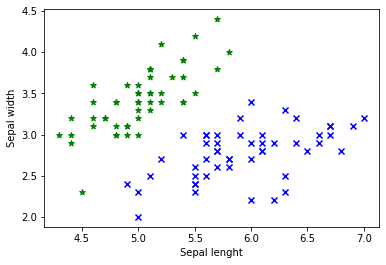

In [9]:
#sentosa vs versicolor (sepal length vs sepal width)
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='green',marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color='blue',marker='x')
plt.xlabel("Sepal lenght")
plt.ylabel("Sepal width")

Text(0, 0.5, 'petal width')

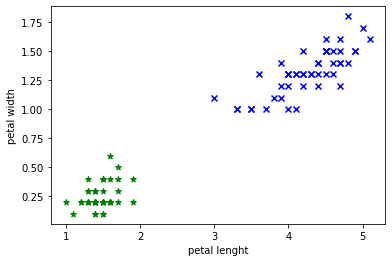

In [10]:
#sentosa vs versicolor (petal length vs petal width)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color='green',marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color='blue',marker='x')
plt.xlabel("petal lenght")
plt.ylabel("petal width")

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(['target','flower_name'],axis='columns')
y = df.target

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(len(X_train))
print(len(X_test))

120
30


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_test,y_test)

0.9666666666666667

In [18]:
knn.predict(X_test)

array([2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 2, 0, 0, 0, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33.0, 0.5, 'Actual')

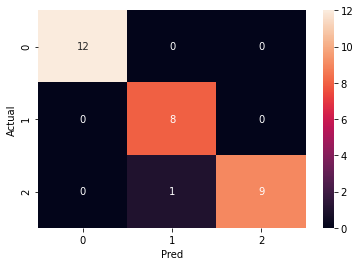

In [23]:
#for visulaization:
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel("Pred")
plt.ylabel("Actual")

In [24]:
#we can also use classification report instead of confusion marix:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [25]:
df.index

RangeIndex(start=0, stop=150, step=1)